In [1]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import seaborn as sns
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255.0
test_X = test_X/255.0

In [2]:
def calcDarkness(image):
    sum = 0
    for row in image:
        for col in row:
            sum += col
    return sum

In [3]:
totals = [[] for i in range (0,10)]
for i in range(len(train_X)):
    totals[train_y[i]].append(calcDarkness(train_X[i]))

averages = [sum(i)/len(i) for i in totals]

#There will be ten total darkness because there are 10 digits (0-9)

def averagePredict(image):
    min = 0
    dark = calcDarkness(image)
    for i in range(len(averages)):
        if (abs(dark - averages[i]) < abs(dark - averages[min])):
            min = i
    return min

In [4]:
correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_X)):
    if (averagePredict(test_X[i]) == test_y[i]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

for i in range(len(measured)):
    print(f'{i}: {correctGuess[i]/measured[i]}')

#the digits 0 and 1 had the best results

0: 0.5510204081632653
1: 0.826431718061674
2: 0.04941860465116279
3: 0.048514851485148516
4: 0.048879837067209775
5: 0.08071748878923767
6: 0.060542797494780795
7: 0.2898832684824903
8: 0.13449691991786447
9: 0.044598612487611496


[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Average Darkness Heat Map')]

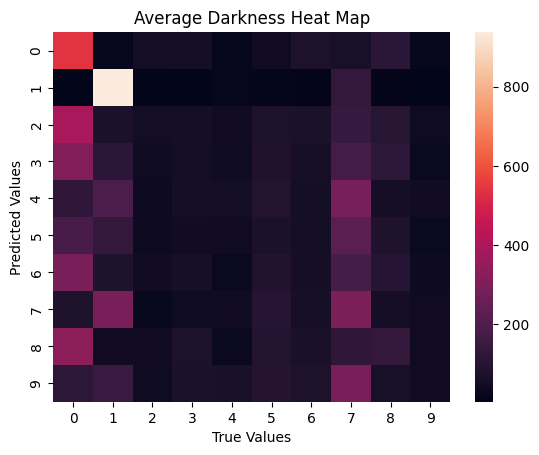

In [5]:
results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][averagePredict(test_X[i])] += 1
averageMap = sns.heatmap(results)
averageMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Average Darkness Heat Map')

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2600
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1127
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0777
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0578
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0437
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0353
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0280
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0229
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0183
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0164


In [7]:
predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

313/313 [==============================] - 1s 3ms/step


In [8]:
correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

for i in range(len(measured)):
    print(f'{i}: {correctGuess[i]/measured[i]}')

0: 0.9887755102040816
1: 0.9911894273127754
2: 0.9796511627906976
3: 0.9881188118811881
4: 0.9775967413441955
5: 0.9674887892376681
6: 0.9791231732776617
7: 0.9542801556420234
8: 0.9763860369609856
9: 0.9762140733399405


[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

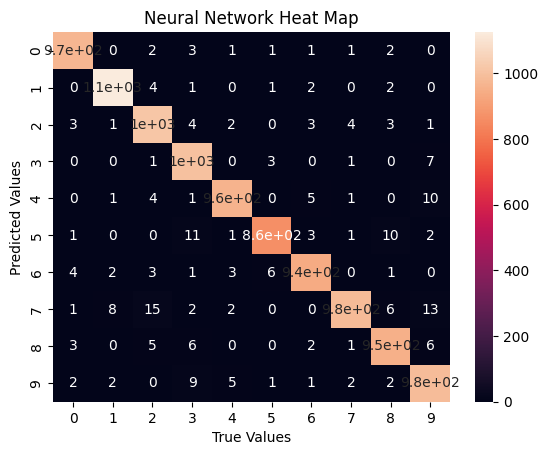

In [9]:
results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')